In [21]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['sex']=le.fit_transform(df['sex'])
df['cp']=le.fit_transform(df['cp'])
df['trestbps']=le.fit_transform(df['trestbps'])
df['chol']=le.fit_transform(df['chol'])
df['fbs']=le.fit_transform(df['fbs'])
df['restecg']=le.fit_transform(df['restecg'])
df['thalach']=le.fit_transform(df['thalach'])
df['exang']=le.fit_transform(df['exang'])
df['oldpeak']=le.fit_transform(df['oldpeak'])

print(df)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0        18    43    0        1       67      0       10   
1      53    1   0        28    34    1        0       54      1       29   
2      70    1   0        31    12    0        1       25      1       25   
3      61    1   0        33    34    0        1       60      0        0   
4      62    0   0        27   116    1        1        9      0       18   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1        28    52    0        1       63      1        0   
1021   60    1   0        18    87    0        0       40      1       26   
1022   47    1   0         8   103    0        0       19      1       10   
1023   50    0   0         8    83    0        0       58      0        0   
1024   54    1   0        14    24    0        1       14      0       14   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [24]:
x=df.drop(columns=['exang'])
y=df['exang']

print("XXXX",x)
print("YYYY",y)


XXXX       age  sex  cp  trestbps  chol  fbs  restecg  thalach  oldpeak  slope  ca  \
0      52    1   0        18    43    0        1       67       10      2   2   
1      53    1   0        28    34    1        0       54       29      0   0   
2      70    1   0        31    12    0        1       25       25      0   0   
3      61    1   0        33    34    0        1       60        0      2   1   
4      62    0   0        27   116    1        1        9       18      1   3   
...   ...  ...  ..       ...   ...  ...      ...      ...      ...    ...  ..   
1020   59    1   1        28    52    0        1       63        0      2   0   
1021   60    1   0        18    87    0        0       40       26      1   1   
1022   47    1   0         8   103    0        0       19       10      1   1   
1023   50    0   0         8    83    0        0       58        0      2   0   
1024   54    1   0        14    24    0        1       14       14      1   1   

      thal  target  
0

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

print("DF",df.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

DF (1025, 14)
x_train (820, 13)
x_test (205, 13)
y_train (820,)
y_test (205,)


In [28]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)

#model evaluat

y_pred=NB.predict(x_test)
print("y_pred",y_pred)
print("y_test",y_test)

y_pred [0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
y_test 172    0
374    1
951    0
3      0
557    0
      ..
299    0
10     0
775    1
957    0
970    0
Name: exang, Length: 205, dtype: int64


In [32]:
column_names = df.columns
print(column_names)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


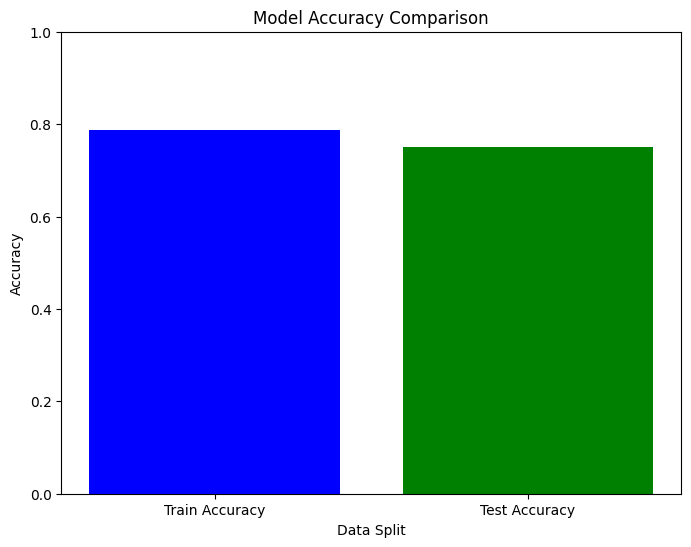

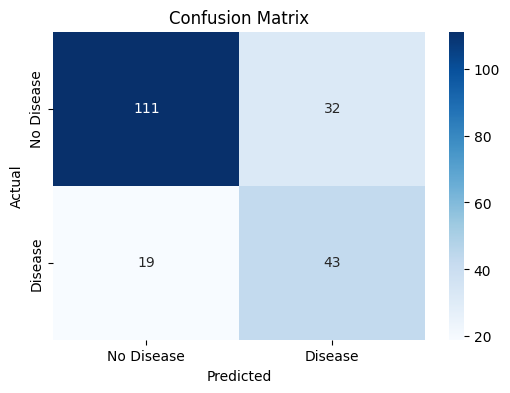

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_train = NB.predict(x_train)
y_pred_test = NB.predict(x_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

#bar chart to visualize accuracy
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1) 
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#model prediciton
testprediction = NB.predict([[29, 0, 2, 100, 106, 1, 2, 80, 1, 1, 1, 0, 2]])

if testprediction==1:
    print('patient have heart disease')
else:
    print('normal dude')

normal dude
